In [3]:
// Генеруємо масив з 100 випадкових чисел від 0 до 10
const randomNumbers: number[] = Array.from(
  { length: 100 },
  () => Math.floor(Math.random() * 11)
);

console.log(randomNumbers);

[
   2, 6, 9, 3, 10, 10,  7, 10, 0, 9,  0, 10,
   5, 6, 1, 5,  3,  3,  1,  8, 4, 2,  0,  5,
  10, 3, 5, 0,  2,  8,  7,  9, 0, 4,  7,  4,
   2, 8, 3, 9,  4,  4,  9,  1, 9, 3, 10,  9,
   1, 9, 3, 3,  5, 10,  8,  3, 7, 7,  7,  8,
   0, 3, 7, 9, 10,  2, 10, 10, 8, 4,  8,  2,
   1, 5, 7, 5, 10,  3,  2, 10, 3, 3,  0,  2,
   5, 1, 8, 7,  2,  7,  2,  1, 8, 6,  1,  1,
   6, 3, 9, 8
]


In [4]:
// Рахуємо кількість кожного числа
const counts: number[] = Array(11).fill(0);
randomNumbers.forEach(num => counts[num]++);

console.log(counts);

[
   7, 9, 10, 14,  6,
   8, 4, 10, 10, 10,
  12
]


In [15]:
// Перетворюємо дані для візуалізації
const distributionData = counts.map((count, value) => ({
  value: value.toString(),
  count
}));

// Візуалізація розподілу за допомогою Plot
await display(
  Plot.plot({
    title: "Розподіл випадкових чисел (0-10)",
    marginLeft: 60,
    x: {
      label: "Значення",
      type: "band"
    },
    y: {
      label: "Кількість",
      grid: true
    },
    marks: [
      Plot.barY(distributionData, {x: "value", y: "count", fill: "#4CAF50"}),
      Plot.ruleY([0])
    ],
    color: { legend: false },
    width: 800,
    height: 400,
    document,
  })
);

Розподіл випадкових чисел (0-10) 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ↑ Кількість 0 1 10 2 3 4 5 6 7 8 9 Значення

In [6]:
import pl from "npm:nodejs-polars";
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts";

In [7]:
let response = await fetch(
  "https://gist.githubusercontent.com/agustinustheo/195f32a4a6c68c493056c883d959ca35/raw/c7363d8b916ab00a2d1747adb89fca120da29f42/mock_financial_data.csv",
);

let data = await response.text();

let df = pl.readCSV(data, { sep: "," });

await display(df.sample(10));

Date,Income,Expenses,NetIncome,BudgetIncome,ActualIncome,BudgetExpenses,ActualExpenses,Salaries,R&D,Marketing,Utilities,Rent,Equipment,Software,Hardware,Consulting,Office Supplies,DiffIncome,DiffExpenses
2022-02-03,343,248,95,352,343,251,248,36,26,30,49,40,49,4,1,4,9,9,3
2022-01-30,346,249,97,343,346,247,249,28,35,49,43,27,37,7,8,8,7,-3,-2
2022-06-14,247,236,11,248,247,236,236,25,46,25,44,45,39,2,2,1,7,1,0
2022-05-23,288,240,48,275,288,234,240,33,30,41,35,29,39,7,9,9,8,-13,-6
2022-02-28,280,228,52,280,280,233,228,43,29,29,33,49,27,1,8,3,6,0,5
2022-03-04,223,196,27,231,223,194,196,21,34,21,28,38,27,8,9,2,8,8,-2
2022-02-22,299,262,37,301,299,269,262,43,41,45,33,44,35,5,9,1,6,2,7
2022-02-19,307,261,46,304,307,262,261,44,35,40,37,44,39,8,3,6,5,-3,1
2022-07-01,271,233,38,254,271,228,233,30,37,42,37,49,20,5,6,4,3,-17,-5
2022-03-25,346,236,110,342,346,237,236,24,36,48,23,41,44,4,4,3,9,-4,1


In [8]:
import * as d3 from "npm:d3";
import { createCanvas } from "https://deno.land/x/skia_canvas/mod.ts";

In [9]:
const lastDataPoint = df.tail(1).toRecords()[0];
console.log(lastDataPoint);

{
  Date: "2022-07-19",
  Income: 316,
  Expenses: 211,
  NetIncome: 105,
  BudgetIncome: 317,
  ActualIncome: 316,
  BudgetExpenses: 212,
  ActualExpenses: 211,
  Salaries: 29,
  "R&D": 48,
  Marketing: 20,
  Utilities: 35,
  Rent: 22,
  Equipment: 39,
  Software: 3,
  Hardware: 3,
  Consulting: 6,
  "Office Supplies": 6,
  DiffIncome: 1,
  DiffExpenses: 1
}


In [10]:
let categories = ['Salaries', 'R&D', 'Marketing', 'Utilities', 'Rent', 'Equipment', 'Software', 'Hardware', 'Consulting', 'Office Supplies'];

// Sample data
const sampleData1 = [];
for(let i = 0; i < categories.length; i++) {
    const category = categories[i];
    sampleData1.push({
        category,
        amount: lastDataPoint[category],
    });
}

10

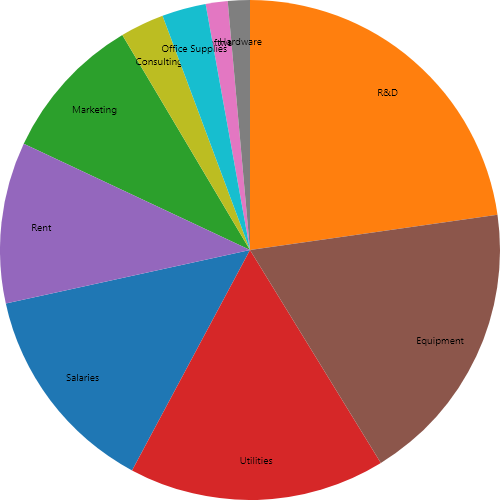

In [11]:
const width = 500;
const height = 500;
const radius = Math.min(width, height) / 2;

// Create a pie function
const pie = d3.pie().value(d => d.amount);

// Create an arc generator for the slices
const arc = d3.arc()
    .innerRadius(0)
    .outerRadius(radius);

// Create an arc generator for the labels
const labelArc = d3.arc()
    .innerRadius(radius - 40) // Adjust to position the labels
    .outerRadius(radius - 40);

// Create the canvas
const canvas = createCanvas(width, height);
const ctx = canvas.getContext("2d");

// Translate to center the pie chart
ctx.translate(width / 2, height / 2);

// Draw the pie chart
pie(sampleData1).forEach((d, i) => {
    // Draw the slice
    ctx.beginPath();
    arc.context(ctx)(d);
    ctx.fillStyle = d3.schemeCategory10[i % 10];
    ctx.fill();

    // Draw the label
    ctx.fillStyle = "#000"; // Label color
    ctx.textAlign = "center";
    ctx.textBaseline = "middle";

    const centroid = labelArc.centroid(d);
    ctx.fillText(d.data.category, centroid[0], centroid[1]);
});

// Display the canvas
await display(canvas);

In [12]:
import * as Plot from "npm:@observablehq/plot";
import { DOMParser, SVGElement } from "npm:linkedom";
const document = new DOMParser().parseFromString(
  `<!DOCTYPE html><html lang="en"></html>`,
  "text/html",
);

let records = df.tail(40).toRecords();

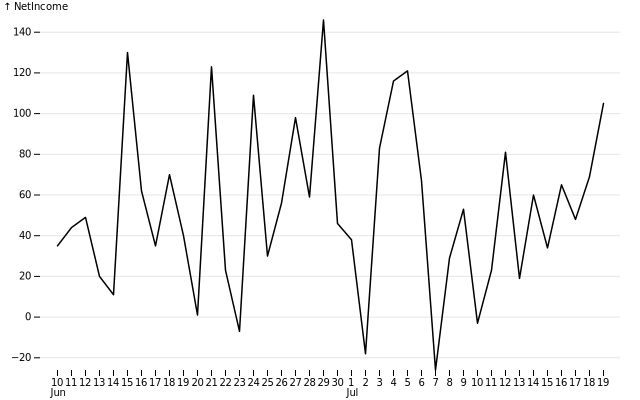

In [13]:
let convertedArray = records.map(item => {
    return {
        NetIncome: item.NetIncome,
        Date: new Date(item.Date)
    };
});

await display(
  Plot.plot({
    x: { type: "band" },
    y: { grid: true },
    marks: [
      Plot.line(convertedArray, {x: "Date", y: "NetIncome"}),
    ],
    document,
  }),
);

In [14]:
let sampleData2 = [];
for (let i = 0; i < records.length; i++) {
  const currentRecord = records[i];
  for (let x = 0; x < categories.length; x++) {
    const currentCategory = categories[x];
    sampleData2.push({
      date: new Date(currentRecord["Date"]),
      category: currentCategory,
      count: currentRecord[currentCategory],
    });
  }
}

await display(
  Plot.plot({
    x: { type: "band" },
    y: { grid: true },
    marks: [
      Plot.barY(sampleData2, { x: "date", y: "count", fill: "category" }),
      Plot.ruleY([0]),
    ],
    color: { legend: true },
    document,
  }),
);

Consulting Equipment Hardware Marketing Office Supplies R&D Rent Salaries Software Utilities 0 20 40 60 80 100 120 140 160 180 200 220 240 260 ↑ count 10 Jun 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 1 Jul 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19